# Bank-full is a dataset with full discriptions of people. The banks would use this information to for marketing purposes. The goal is ultimately to see if an individual will subscribe to a term deposit.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#The dataset does not look correct. Everything is in one column, and the one column has all the column names.
pd.read_csv('bank-full.csv').head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


In [3]:
#By realizing that the first value seperated by a semicolon corresponds with the first value of the column name,
#It is obvious that what seperates everything is a semicolon. This means the delimiter has to be a semicolon
df = pd.read_csv('bank-full.csv',delimiter=';')

In [4]:
df.head()
#Much better

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Do a KNN of account balance. Predict the account balance based on age, job, education, housing
# I chose these 4 valiables because they each have a stong bearing on financial success. Older people tend to have higher level jobs because they have worked their way up. A surgeon makes more that a cashier. A college graduate makes more than a high school graduate. It is hard to find and maintain a high paying job if you are homeless. 

In [5]:
#Get independent valiables into X
X = df[['age','job','education','housing']]
# Put our dependent variable into y
y = df['balance']

In [6]:
#Seperate into numerical and strings
Xcon = df['age']
Xcat = df[['job','education','housing']]
#Perform dummies on the strings to make them interpretable my the Logistic Regression
Xcat = pd.get_dummies(Xcat,drop_first=True)

In [7]:
#Combine the numerical and dummy values
X = pd.concat([Xcon,Xcat],axis=1)
X.dropna(inplace=True)

In [8]:
df.loc[0]

age                  58
job          management
marital         married
education      tertiary
default              no
balance            2143
housing             yes
loan                 no
contact         unknown
day                   5
month               may
duration            261
campaign              1
pdays                -1
previous              0
poutcome        unknown
y                    no
Name: 0, dtype: object

In [9]:
#Perform a KNN test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .25, random_state = 1)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
yPredict = knn.predict(X_test)

In [13]:
yPredict[:20]

array([   78,   300,     2,     0,  -770,     2,     0,     0,    96,
        -337,   154,   101,  -455,  -185,     2,  -357,     0, 15834,
        4321,   133])

In [14]:
#The score is straigh garbage. With an accuracy of 2.9%, there is really nothing to be done
knn.score(X_test, y_test)

0.028664956206316906

In [15]:
yTest = y_test.tolist()

In [16]:
#Here I am using zip to compare every wrong value with it's correct value. You iterate through yPredict and yTest,
#and when ever they don't match, they are added to an array. Those arrays are combined so that values with the same 
#index become tuples
len(yPredict)
test = []
pred = []
for i in range (0,11303):
    if (yPredict[i] != yTest[i]):
        test.append(yTest[i])
        pred.append(yPredict[i])
combo = zip(test,pred)
print(tuple(combo))

((2519, 78), (2209, 300), (923, 2), (306, 0), (257, -770), (-36, 2), (3457, 0), (236, 96), (1285, -337), (-41, 154), (315, 101), (0, -455), (1467, -185), (1957, 2), (-329, -357), (1, 0), (5563, 15834), (-689, 4321), (778, 133), (164, 198), (0, 45), (2875, 0), (1477, -119), (0, -357), (896, -40), (439, 0), (231, 0), (7929, 0), (5187, 15), (1070, 0), (179, 495), (286, -420), (630, 70), (737, 221), (263, 280), (0, -216), (2688, 600), (217, 11), (175, 0), (10287, -19), (422, 35), (1066, -605), (4447, -220), (2328, 0), (356, 101), (8332, 78), (2567, 2557), (13, 133), (1678, -1206), (-1, 35), (1925, 0), (1134, -57), (530, 72), (1415, -103), (-11, 0), (-52, 0), (-458, 357), (6, -312), (295, -582), (-2, 12), (1147, 7005), (0, -229), (0, 105), (249, 0), (1972, 192), (-345, 0), (733, -204), (49, 211), (0, -825), (-932, -135), (162, 0), (243, 5), (4418, -326), (655, 0), (726, -233), (292, 252), (1046, 54), (1431, 0), (8649, -168), (2791, 0), (31, 124), (8730, -681), (1568, 635), (451, 0), (0, 354

# It seems to me that balance is not a suitable y for KNN. I think this is because balance has too many values. Look for another column with less values

# Lets see if we can predict the job someone has based on the age, marital status, education, balance, housing. I chose job because there are much fewer possible values for job. This dataset contains about 10 jobs, but over a thousand unique bank account balances. I once again chose the above variables because all of them can affect what job you pursue

In [17]:
#Once again getting our X and y values. Once again using dummies on X, but also on y because y is made of strings as
# well, like "technician"
y = df['job']
Xcon = df[['age', 'balance']]
Xcat = df[['marital','education','housing']]
Xcat = pd.get_dummies(Xcat,drop_first=True)
X = pd.concat([Xcon,Xcat],axis=1)
X.dropna(inplace = True)
y = pd.get_dummies(y, drop_first=True)
y.dropna(inplace = True)

In [18]:
#Lets train the model and see the classification report
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .25, random_state = 1)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
yPredict = knn.predict(X_test)
print(classification_report(yPredict,y_test))
#While we have seen some improvements, with none of the jobs dipping below the accuracy of balance. Yet it is really
#bad, with the best not cracking 50%.

              precision    recall  f1-score   support

           0       0.17      0.34      0.22      1151
           1       0.00      0.05      0.01        20
           2       0.02      0.24      0.04        33
           3       0.23      0.48      0.31      1171
           4       0.29      0.62      0.39       255
           5       0.02      0.28      0.04        29
           6       0.04      0.23      0.08       198
           7       0.10      0.42      0.17        62
           8       0.10      0.32      0.16       625
           9       0.01      0.13      0.01        15
          10       0.03      0.67      0.05         3

   micro avg       0.14      0.40      0.21      3562
   macro avg       0.09      0.34      0.13      3562
weighted avg       0.17      0.40      0.24      3562
 samples avg       0.12      0.12      0.12      3562



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
knn.score(X_test, y_test)

0.2108289834557197

# Precision and recall have definately improved, but I think we can do better. I am going to try to add more columns, even some that don't seem to corrilate to job. If this doesn't work I will look for another column to make my y. Even though my data isn't entirely suited for this kind of analysis, hopefully I can make it work

In [20]:
# We are dummies again. Way more values in X, taking everything into consideration
y = df['job']
Xcon = df[['age', 'balance', 'campaign', 'duration','pdays','previous']]
Xcat = df[['marital','education','housing','contact','month']]
Xcat = pd.get_dummies(Xcat,drop_first=True)
X = pd.concat([Xcon,Xcat],axis=1)
X.dropna(inplace = True)
y = pd.get_dummies(y, drop_first=True)
y.dropna(inplace = True)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .25, random_state = 1)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
yPredict = knn.predict(X_test)
print(classification_report(yPredict,y_test))

              precision    recall  f1-score   support

           0       0.09      0.24      0.13       898
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         4
           3       0.10      0.27      0.14       857
           4       0.04      0.46      0.08        50
           5       0.00      0.00      0.00         5
           6       0.01      0.10      0.01        68
           7       0.00      0.20      0.01         5
           8       0.04      0.17      0.07       471
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         0

   micro avg       0.06      0.24      0.09      2366
   macro avg       0.03      0.13      0.04      2366
weighted avg       0.08      0.24      0.12      2366
 samples avg       0.05      0.05      0.05      2366



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# I don't think this works. Everything has hit as low as I have every seen it. I think this is from an effect called confounding variables. From google: "In statistics, a confounder is a variable that influences both the dependent variable and independent variable, causing a spurious association. " Something that would qualify as this is education. Education is directly connected to what job you get. If you study engineering you will join the field of engineering. But education is also connected to balance or housing conditions. Essentially, by adding all these variables I am adding to the interconnectedness of the dataset, and blurring the lines between dependent and independent variables

# I will try is marital status. The fact that is only has three values can help, and additionally the columns job balance and education level might have something to do with it. By choosing less independent variables we are cutting down on the effect of confounding variables

In [22]:
y = df['marital']
Xcon = df[['age', 'balance']]
Xcat = df[['education','housing','job']]
Xcat = pd.get_dummies(Xcat,drop_first=True)
X = pd.concat([Xcon,Xcat],axis=1)
X.dropna(inplace = True)
y = pd.get_dummies(y)
y.dropna(inplace=True)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .25, random_state = 123)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
yPredict = knn.predict(X_test)
print(classification_report(yPredict,y_test))

              precision    recall  f1-score   support

           0       0.07      0.28      0.11       327
           1       0.76      0.67      0.71      7541
           2       0.44      0.59      0.50      2448

   micro avg       0.59      0.64      0.61     10316
   macro avg       0.42      0.51      0.44     10316
weighted avg       0.66      0.64      0.64     10316
 samples avg       0.59      0.59      0.59     10316



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# It has a VERY poor precision with divorced, all things considered great precision with married, and not too good precision with singles. This is the best I have gotten yet, and still not ideal. This shows that this dataset is not suited at all for KNN. The last thing I want to try is KFold, so I can use all of my dataset.

In [24]:
#Import and make a KFold
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=11)
#Figure out the score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = knn, X = X, y= y, cv = kfold)
print(scores)

[0.60305175 0.59345278 0.57730591 0.59809777 0.60008848 0.59544349
 0.59057731 0.59477992 0.59278921 0.59256802]


In [25]:
scores.mean()

0.5938154600365624

In [26]:
scores.std()

0.006575487757134801

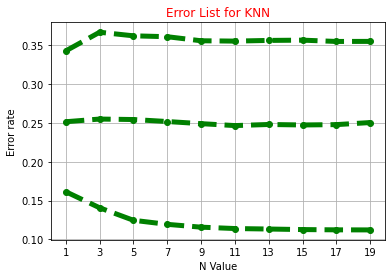

In [27]:
#Great the error of this dataset
import numpy as np
errorLst = []
for i in range (1,20,2):
    knn= KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    errorLst.append(np.mean(pred!=y_test))
    
plt.plot(range(1,20,2),errorLst,linewidth=5,color='Green',linestyle='dashed',marker='o')
plt.title('Error List for KNN', fontdict = {'color':'Red'});
plt.xlabel('N Value');
plt.ylabel('Error rate');
plt.grid();
plt.xticks(range(1,20,2));

Error is low to decently high, but not bad at all. So far this is the post accurate we have gotten.

Text(0.5, 1.0, 'Error List for KNN Distplot')

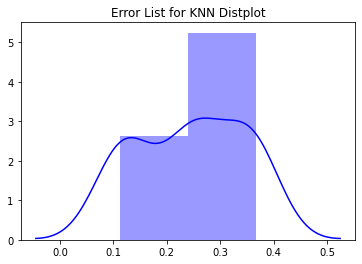

In [28]:
#Make a distplot of the error as well
#The error is bimodal
sns.distplot(errorLst,color='Blue')
plt.title('Error List for KNN Distplot')

In [29]:
errorLst

[divorced    0.161462
 married     0.342741
 single      0.251526
 dtype: float64,
 divorced    0.140759
 married     0.366717
 single      0.254977
 dtype: float64,
 divorced    0.124657
 married     0.362116
 single      0.254357
 dtype: float64,
 divorced    0.119437
 married     0.360966
 single      0.251792
 dtype: float64,
 divorced    0.115810
 married     0.355746
 single      0.249049
 dtype: float64,
 divorced    0.114041
 married     0.355304
 single      0.246572
 dtype: float64,
 divorced    0.113421
 married     0.356189
 single      0.247987
 dtype: float64,
 divorced    0.112713
 married     0.356543
 single      0.247368
 dtype: float64,
 divorced    0.112360
 married     0.354862
 single      0.247810
 dtype: float64,
 divorced    0.112271
 married     0.354950
 single      0.250464
 dtype: float64]

# The dataset was never meant for KNN. Lets move onto Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
y = df['y']
y = pd.get_dummies(y,drop_first=True)
y.dropna(inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .25, random_state = 123)

In [46]:
logr.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [47]:
logr.score(X_test,y_test)
#Finally, a score that is high enough to maybe be considered to be statistically significant

0.8846323984782801

In [33]:
yPredict = logr.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test,yPredict)
con_mat

array([[9999,    4],
       [1300,    0]])

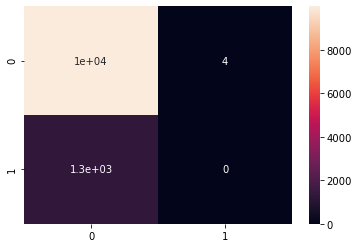

In [36]:
sns.heatmap(confusion_matrix(y_test,yPredict),annot=True)

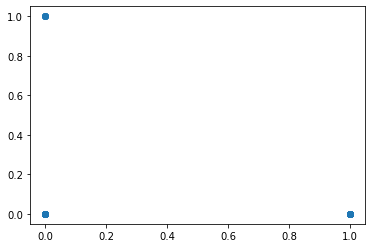

In [37]:
plt.scatter(y_test,yPredict)

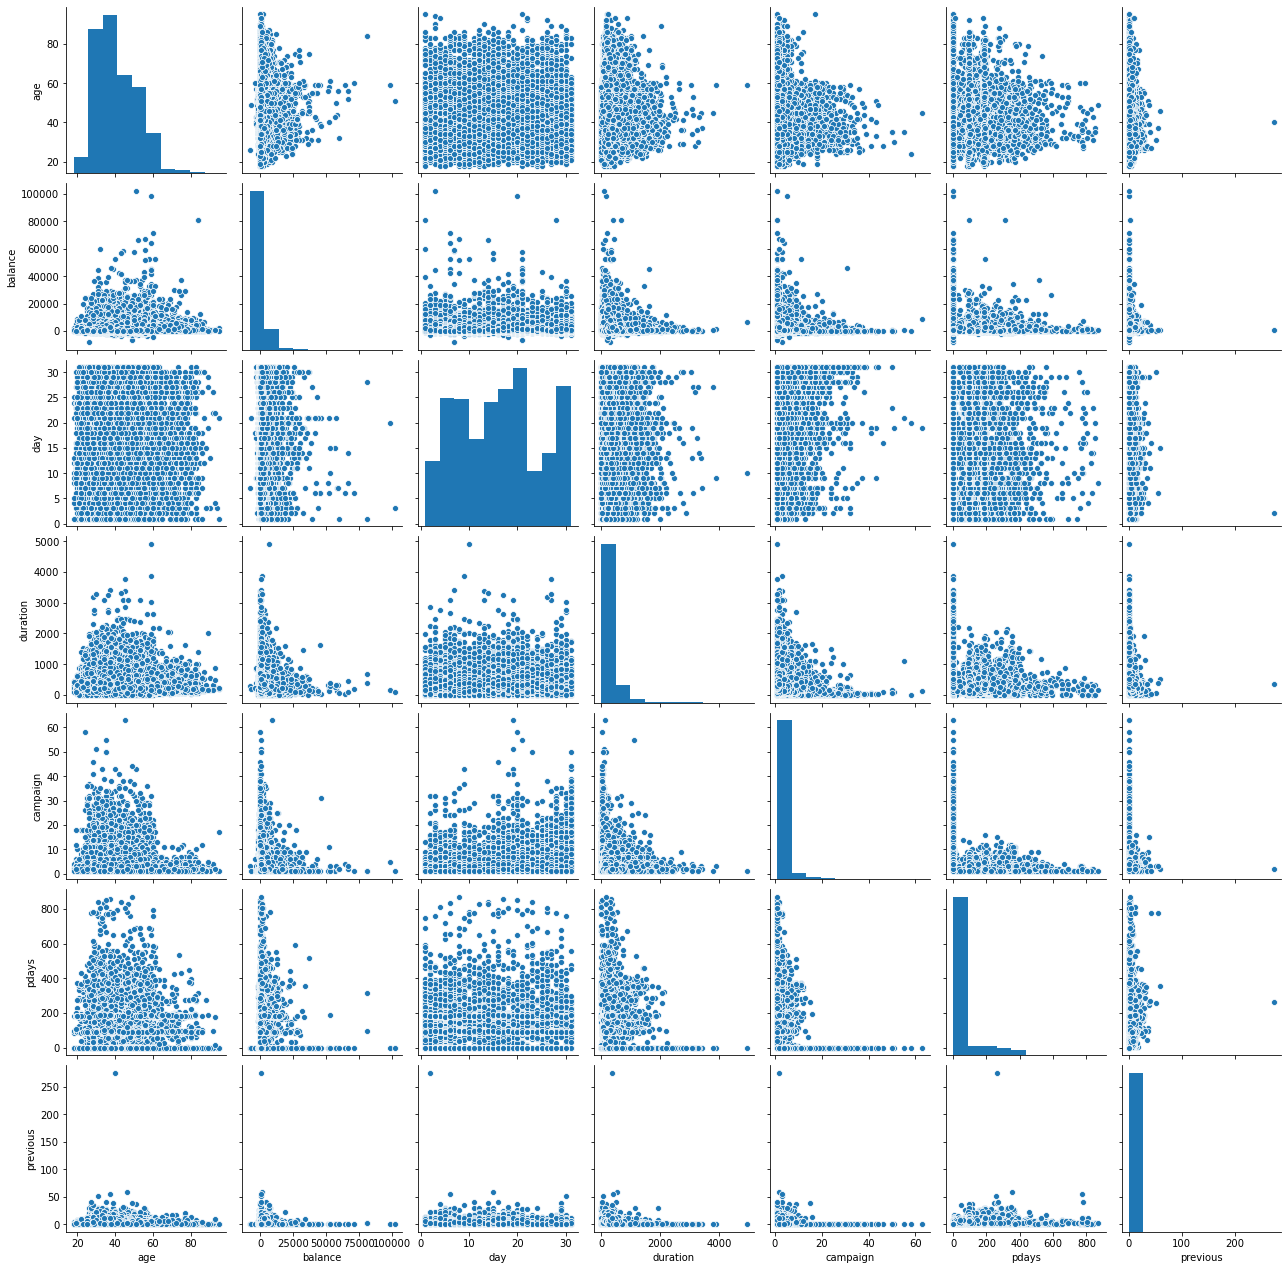

In [38]:
sns.pairplot(df)


<BarContainer object of 3 artists>

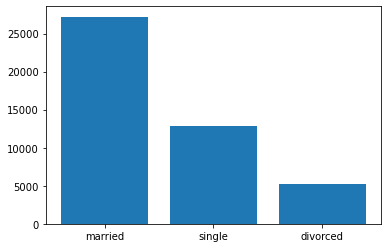

In [39]:
x=df['marital'].value_counts().keys()
z=df['marital'].value_counts()
plt.bar(x,z)

([<matplotlib.patches.Wedge at 0x7fa119675a30>,
 [Text(-1.119866170182921, 0.43116094544826017, 'no'),
  Text(1.0265440170874796, -0.39523079457691607, 'yes')])

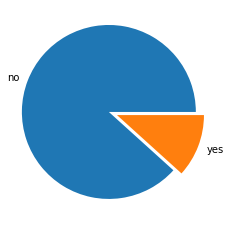

In [40]:
pieX = df['y'].value_counts()
plt.pie(pieX, labels=pieX.keys(),explode = [.1,0])

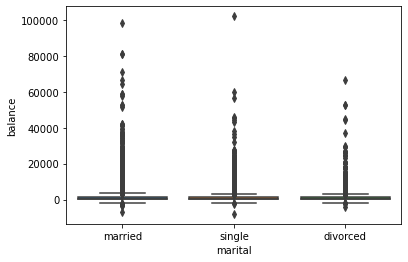

In [41]:
sns.boxplot(x='marital',y='balance',data=df)